# 17BR_magn_coop_diff_cell type

7/29/21


A. The degree predicted cell type specific vocabularies actually drove cell type specific expression in the MPRA. This point is actually pretty opaque to me still as the paper and figures were configured initially and if we had some correlation matrix to specifically show this, it could help make the central point of the paper. So, putting cell type specific DNA motif combinations [maybe colored by cell type] on one edge of the matrix and cell type-specific MPRA activity on the other edge with enrichment score heat map would be one way to address this central and critical gap in the paper. You can be certain that not only the Reviewers but even the Editors will kill the paper on initial screening without this clear information. I apologize that I did not push for clarity on this as the figures were being drafted.
 
B. The degree to which malignant cells A) engage activity of new synergistic DNA motif combinations (DMCs) versus B) differentially modulating existing normal lineage DMCs and C) the putative target genes and their biological processes for each. As configured, the figures don’t address this and I cant figure it out but you can bet the Reviewers will demand this also.
Neoplastic cells engage new DMCs – these need to be more clearly shown, quantified, and maybe should go into a supplementary table
Neoplastic cells differentially modulate DMCs active in their normal counterparts that mediate neoplasia-relevant processes – the same, with the biological impact emphasized – a venn diagram for KC/cSCC and MC/MM of shared and unique DMCs would help address both points
The target genes of the normal unique DMCs, the cancer unique DMCs, and the overlapping DMCs in GO would be critical here


update 10/24/21

 'cell type-specific DMC' panel? Essentially, this is what I'm envisioning:
4 columns x rows for all functional DMCs as determined by MPRA
Column 1 = rows of DMCs grouped and colored by cell type
Colon (yellow), GM (grey), KC (red), MC (blue), SCC (green), MM (orange)
Column 2 = rows of DMCs grouped and colored by functional category
Redundant (yellow), Buffer (green), Synergy (pink), Single Driver (purple)
Column 3 = rows of DMCS with heat map of p-value for cell type-specificity
I'm thinking maybe the color scale could mimic the ones you used for the PPV matrices? Light red = p-value <0.1 to purple = not significant
Maybe add stars to the DMCs with p values <0.1
Column 4 = rows of DMC labels


In [5]:
library(tidyverse)
library(pheatmap)
library(RColorBrewer)
save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}


In [6]:
save_prefix = '../data/processed/mpra/'

In [7]:
mpra_tissues = c('Colon', 'GM', 'COLO', 'MC', 'KCD6', 'A431')

nl_tissues = c('Colon', 'GM',  'MC', 'KCD6')
scc_tissues = c('KCD6','A431')
mm_tissues = c('MC','COLO')


In [8]:
# get cooperative values
normlog_vocab_df_coop = read.csv('../../miseq/mpraanalyze_results/dk_norm_cooperativity/normlog_vocab_df_coop.csv',row.names=1, stringsAsFactor=F)%>%
    arrange(vocab,tissue)
head(normlog_vocab_df_coop)
# get AND vocabs
new_mpra_df = read.csv('../data/processed/mpra/results_df_piv_match_count.csv',row.names=1, stringsAsFactor=F)
# filter for AND VOCABs
and_vocab = unique(new_mpra_df[new_mpra_df$consensus_class=='AND',]$vocab)
# vocab to tissue annon
vocab_tissue = normlog_vocab_df_coop%>%
    select(vocab, tissue)%>%distinct()%>%column_to_rownames('vocab')

,vocab,instance,tissue,mpra_tissue,orient,value
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,ARID5B::KLF5,1,KCD6,A431,A_B_coop,-0.17814995
2,ARID5B::KLF5,1,KCD6,A431,A_B_add,-0.70057126
3,ARID5B::KLF5,1,KCD6,COLO,A_B_coop,-0.23988524
4,ARID5B::KLF5,1,KCD6,COLO,A_B_add,-0.18466997
5,ARID5B::KLF5,1,KCD6,Colon,A_B_coop,-0.08529029
6,ARID5B::KLF5,1,KCD6,Colon,A_B_add,-0.52852010


In [106]:
vocab_tissue%>%group_by(tissue)%>%tally()

tissue,n
<chr>,<int>
A431,43
COLO,40
Colon,42
GM,39
KCD6,49
MC,26


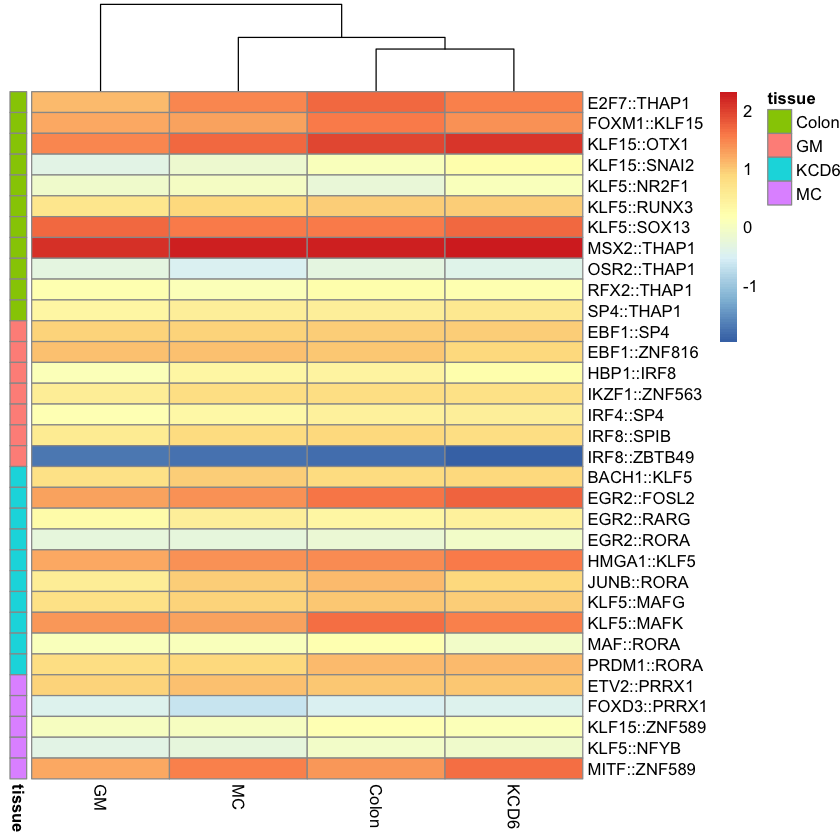

In [81]:
coop_nl_df = normlog_vocab_df_coop%>% 
#     pivot_wider(names_from = orient, values_from = value)%>%
#     mutate(value=A_B_coop - A_B_add)%>%
    filter(vocab %in% and_vocab)%>%
    filter((tissue %in% nl_tissues)&(mpra_tissue%in% nl_tissues))%>%
    group_by(vocab, tissue, mpra_tissue)%>%
    summarise(value=mean(value))%>%
    arrange(tissue)
pheatmap(coop_nl_df%>%pivot_wider(id_cols='vocab',names_from='mpra_tissue',values_from=value)%>%column_to_rownames('vocab'),
        annotation_row=vocab_tissue,cluster_rows=F)

write.csv(coop_nl_df, paste0(save_prefix,'coop_nl_df.csv'))


really hard to see differences very vocab specific effect

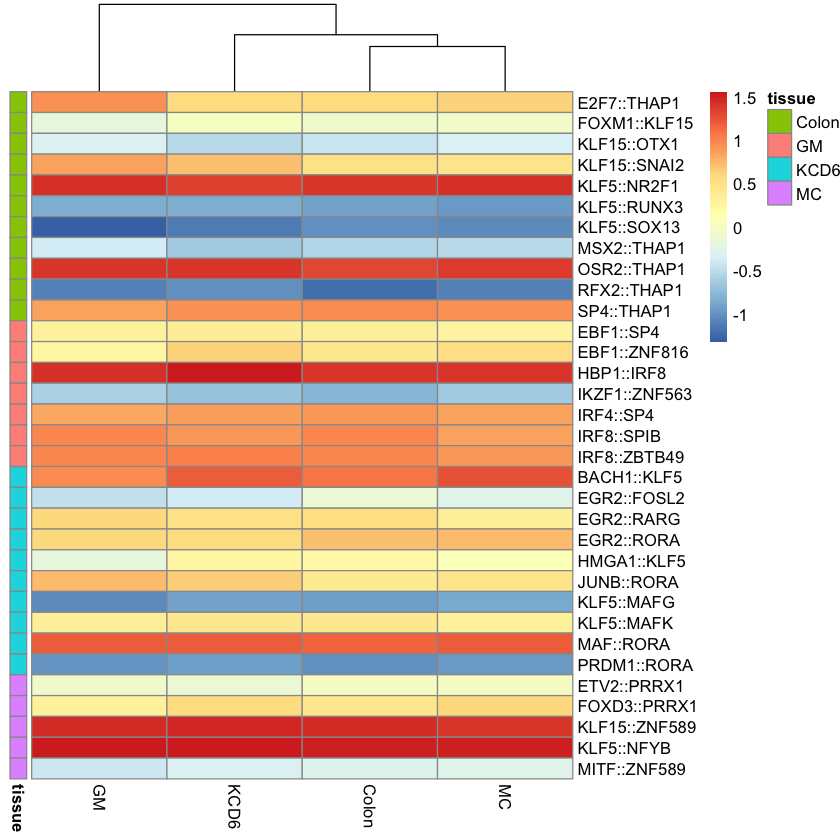

In [82]:
# try cooperative - additive effect
coop_add_nl_df = normlog_vocab_df_coop%>% 
    pivot_wider(names_from = orient, values_from = value)%>%
    mutate(value=A_B_coop - A_B_add)%>%
    filter(vocab %in% and_vocab)%>%
    filter((tissue %in% nl_tissues)&(mpra_tissue%in% nl_tissues))%>%
    group_by(vocab, tissue, mpra_tissue)%>%
    summarise(value=mean(value))%>%
    arrange(tissue)%>%
    group_by(vocab, tissue)%>%
    mutate(min_value=min(value))%>%
    mutate(norm_value = value-min_value)

pheatmap(coop_add_nl_df%>%pivot_wider(id_cols='vocab',names_from='mpra_tissue',values_from=value)%>%column_to_rownames('vocab'),
        annotation_row=vocab_tissue,cluster_rows=F)
write.csv(coop_add_nl_df, paste0(save_prefix,'coop_add_nl_df.csv'))


Warning message in brewer.pal(n = 11, name = "Reds"):
“n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
”


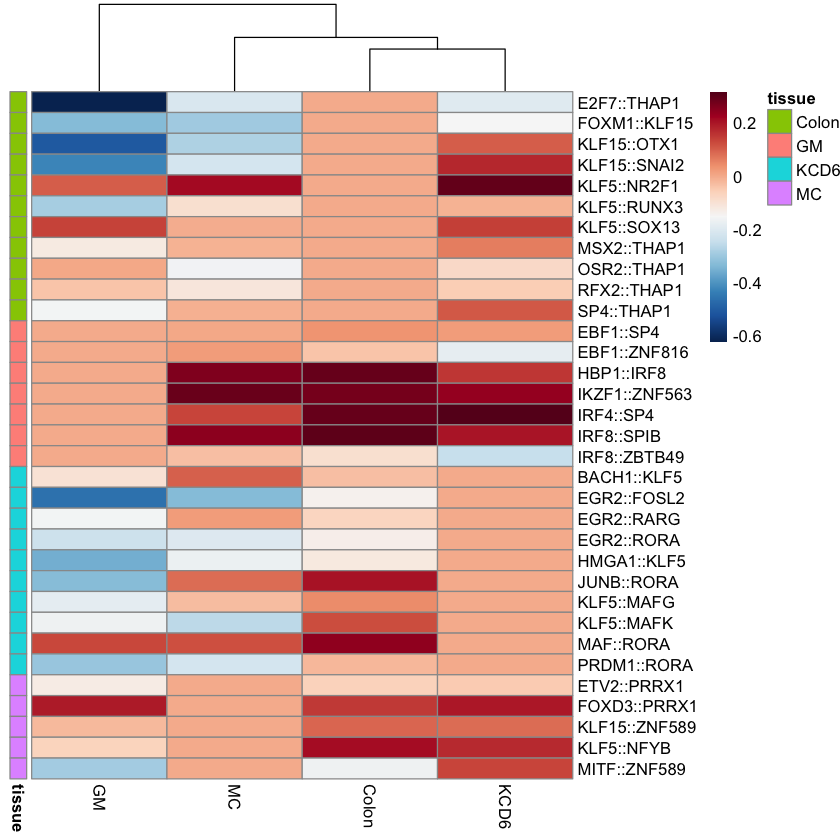

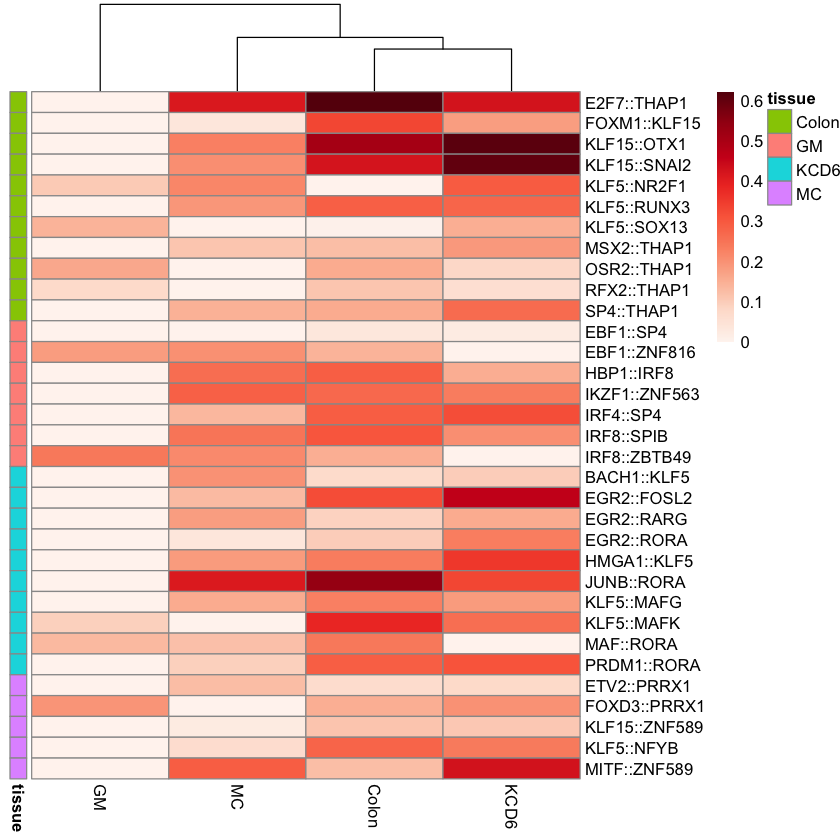

In [80]:
# try normalizing
# first by normalizing to the correct tissue
coop_nl_df_tissue_match = filter(coop_nl_df, tissue==mpra_tissue)%>%select(vocab,tissue,value)%>%rename(norm=value)
coop_nl_df_norm = coop_nl_df%>%
    left_join(coop_nl_df_tissue_match, by=c('vocab','tissue'))%>%
    mutate(norm_value = value-norm)
pheatmap(coop_nl_df_norm%>%pivot_wider(id_cols='vocab',names_from='mpra_tissue',values_from=norm_value)%>%column_to_rownames('vocab'),
        annotation_row=vocab_tissue,cluster_rows=F,
                color = colorRampPalette(rev(brewer.pal(n =11, name ="RdBu")))(255))



# then by normalize the lowest value
coop_nl_df_minus = coop_nl_df%>%
    group_by(vocab, tissue)%>%
    mutate(min_value=min(value))%>%
    mutate(norm_value = value-min_value)
pheatmap(coop_nl_df_minus%>%pivot_wider(id_cols='vocab',names_from='mpra_tissue',values_from=norm_value)%>%column_to_rownames('vocab'),
        annotation_row=vocab_tissue,cluster_rows=F,
               color = colorRampPalette(brewer.pal(n =11, name ="Reds"))(255))


In [85]:
# pheatmap(coop_nl_df%>%pivot_wider(id_cols='vocab',names_from='mpra_tissue',values_from=value)%>%column_to_rownames('vocab'),
#         annotation_row=vocab_tissue,clusters_row=F)

USE THE LAST plot to figure out the best vignettes because the rest look like garbage

FOXM1::KLF15 and EGR2::RORA

also the IRF8::SPIB,  EGR2::RORA

In [115]:
coop_nl_df%>%select(vocab)%>%distinct()%>%dim()

Adding missing grouping variables: `tissue`



[1] 33  2

10 of the 33 synergistic vocab words displayed cell type specific synergy

In [131]:
coop_nl_df_rank_all = coop_nl_df%>% 

#     pivot_wider(names_from = orient, values_from = value)%>%
#     mutate(value=A_B_coop - A_B_add)%>%
#     filter(tissue %in% nl_tissues)%>%
    group_by(vocab, tissue, mpra_tissue)%>%
    summarise(value=mean(value))%>%   
    arrange(desc(value)) %>% 
    group_by(vocab, tissue) %>% 
    mutate(rank=row_number())%>%
    filter(tissue==mpra_tissue)
write.csv(coop_nl_df_rank_all, paste0(save_prefix, 'coop_nl_df_rank_all.csv'))

In [129]:
coop_nl_rank = coop_nl_df%>% 

#     pivot_wider(names_from = orient, values_from = value)%>%
#     mutate(value=A_B_coop - A_B_add)%>%
#     filter(tissue %in% nl_tissues)%>%
    group_by(vocab, tissue, mpra_tissue)%>%
    summarise(value=mean(value))%>%   
    arrange(desc(value)) %>% 
    group_by(vocab, tissue) %>% 
    mutate(rank=row_number())%>%
    filter(tissue==mpra_tissue)%>%filter(rank<3)%>%
    rename(mean_value = value)#%>%

normlog_vocab_df_coop%>%
    filter(orient=='A_B_coop')%>%
    inner_join(coop_nl_rank,by=c('vocab','tissue','mpra_tissue'))%>%
    pivot_wider(names_from=mpra_tissue,values_from=value)%>%
    arrange(vocab)

vocab,instance,tissue,orient,mean_value,rank,KCD6,Colon,GM,MC
<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
BACH1::KLF5,1,KCD6,A_B_coop,0.8632926,2,0.5066795,NA,NA,NA
BACH1::KLF5,10,KCD6,A_B_coop,0.8632926,2,3.8708696,NA,NA,NA
BACH1::KLF5,2,KCD6,A_B_coop,0.8632926,2,-1.3249170,NA,NA,NA
BACH1::KLF5,3,KCD6,A_B_coop,0.8632926,2,-1.4684271,NA,NA,NA
BACH1::KLF5,4,KCD6,A_B_coop,0.8632926,2,0.2720042,NA,NA,NA
BACH1::KLF5,5,KCD6,A_B_coop,0.8632926,2,-1.4485259,NA,NA,NA
BACH1::KLF5,6,KCD6,A_B_coop,0.8632926,2,2.6572946,NA,NA,NA
BACH1::KLF5,7,KCD6,A_B_coop,0.8632926,2,7.2477539,NA,NA,NA
BACH1::KLF5,8,KCD6,A_B_coop,0.8632926,2,0.6753581,NA,NA,NA


In [132]:
normlog_vocab_df_coop%>% 

#     pivot_wider(names_from = orient, values_from = value)%>%
#     mutate(value=A_B_coop - A_B_add)%>%
    filter(tissue %in% nl_tissues)%>%
    group_by(vocab, tissue, mpra_tissue)%>%
    summarise(value=mean(value))%>%   
    arrange(desc(value)) %>% 
    group_by(vocab, tissue) %>% 
    mutate(rank=row_number())%>%
    filter(tissue==mpra_tissue)%>%filter(rank<2)

vocab,tissue,mpra_tissue,value,rank
<chr>,<chr>,<chr>,<dbl>,<int>
FOXM1::PATZ1,Colon,Colon,2.164242226,1
EGR2::FOSL2,KCD6,KCD6,1.736816408,1
E2F7::THAP1,Colon,Colon,1.705766845,1
ARID5B::KLF5,KCD6,KCD6,1.573651562,1
FOXM1::KLF15,Colon,Colon,1.568969244,1
HMGA1::KLF5,KCD6,KCD6,1.566948629,1
RORA::UBP1,KCD6,KCD6,1.286773500,1
HBP1::KLF5,KCD6,KCD6,1.154793572,1
PRDM1::RORA,KCD6,KCD6,1.113640000,1


In [96]:
coop_nl_df%>%filter(vocab=='IRF8::SPIB')

vocab,tissue,mpra_tissue,value
<chr>,<chr>,<chr>,<dbl>
IRF8::SPIB,GM,A431,0.7019429
IRF8::SPIB,GM,COLO,0.8397697
IRF8::SPIB,GM,Colon,0.8861958
IRF8::SPIB,GM,GM,0.5838579
IRF8::SPIB,GM,KCD6,0.7867452
IRF8::SPIB,GM,MC,0.8314791


# cell type specificity 

In [28]:
spec_df = read.csv('../data/processed/mpra/vocab_cell_type_sig_df_norm.csv')
spec_df = spec_df %>% 
    mutate(neglog10pval = -log10(pval))%>%
    arrange(tissue, -neglog10pval)

colnames(spec_df)

row_annon = spec_df%>%
    select(tissue,consensus_class, vocab)%>%
    column_to_rownames('vocab')

plot_df = spec_df%>%
    select(vocab, neglog10pval)%>%
    mutate(filler = 1)%>%
    column_to_rownames('vocab')
    

[1] "X"               "vocab"           "tissue"          "pval"           
[5] "consensus_class" "is_and"          "neglog10pval"

pdf 
  2

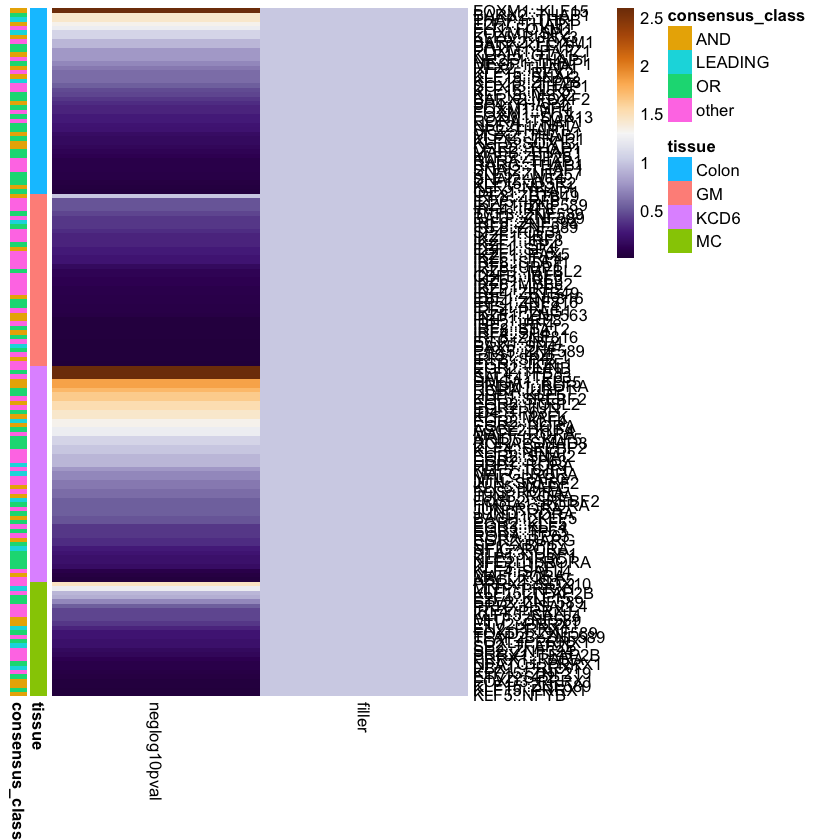

In [33]:
p = pheatmap(plot_df,
            cluster_row=F, cluster_col=F,
            annotation_row = row_annon,
         color = colorRampPalette(rev(brewer.pal(n =11, name ="PuOr")))(255))
save_pheatmap_pdf(p, '../data/processed/mpra/vocab_cell_type_sig_df_norm.pdf', height=20, width=5)